<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from numpy.polynomial import Polynomial

# This function is the same as the one in listing 13.1 and just copied here for convenience:
def piecewise_fit(x_data, y_data, knots_x, degree, n_interpol_points=10):
    """Divides data into intervals and fits a polynomial to each of them

    :param x_data, y_data: data points (numpy arrays)
    :param knots_x: list of the horizontal positions of the support points
                    (= (n_knots-1) intervals)
    :param degree: polynomial degree
    :param n_interpol_points: number of equally spaced points in each interval
    :returns: lists with the approximated data for each interval
    """
    piecewise_data = []
    for x0, x1 in zip(knots_x[:-1], knots_x[1:]):
        idx = (x_data >= x0) * (x_data < x1)
        poly = Polynomial.fit(x=x_data[idx], y=y_data[idx], deg=degree)
        interp_x = np.linspace(x0, x1, n_interpol_points)
        piecewise_data.append((interp_x, poly(interp_x)))

    return piecewise_data

## 13.5 Semi- and Non-Parametric Regression
### 13.5.2 Regression with Piecewise Polynomials

In [2]:
from numpy import array
X = array([-0.92, 1.69, -0.96, 1.89, 0.14, 0.65, 1.26, 0.29, -0.61, -1.05, -1.48, 1.16, -0.04, -1.16, 1.71, -0.69, -0.14, -0.62, 0.71, 0.52, 0.61, -0.76, -0.66, -0.77, -0.49, -1.23, -1.15, 2.06, 2.05, -1.70, -0.99, 1.01, 1.32, -1.73, -1.81, 0.26, 0.77, 2.15, -0.77, 1.41, 1.89, 0.07, 2.13, -0.21, 1.48, 0.40, 1.28, 0.14, -1.69, -1.45, -1.35, -0.79, 0.73, 1.47, 0.47, 0.75, 1.45, 1.91, 1.85, 1.50, -1.44, -0.35, -1.66, 1.39, -1.60, -0.35, -0.81, -0.40, 0.17, 0.54, 1.95, 1.98, 1.59, -0.42, -1.40, -0.27, 0.24, -0.31, -1.76, 1.63, 0.10, 1.60, -0.01, 0.49, -0.15, 2.16, 1.35, -1.56, -1.02, 0.04, 1.02, -0.46, -0.33, 1.86, 2.03, -0.12, 1.78, -1.47, 0.36, 0.87], dtype=float)
y = array([-0.49, -1.55, -0.37, -1.24, 0.13, -0.77, -0.99, -2.36, -1.75, -0.23, 1.71, -0.18, -1.89, 1.83, -0.67, -0.37, -1.66, -1.67, -1.67, -2.15, -1.17, 1.04, -1.60, -1.43, -0.85, 0.86, -0.33, -1.85, -2.17, 1.80, -0.16, -1.38, 0.41, 0.97, 2.30, -2.08, -0.94, -4.27, -0.07, -2.44, -0.70, -2.38, -3.34, -1.99, -0.44, -1.43, -0.80, -1.41, 1.64, 0.85, -0.26, -1.03, -0.13, 0.86, -0.20, -2.36, -0.58, -1.93, -2.97, -0.68, 0.92, -0.76, 1.82, -0.83, 0.98, -2.17, -0.51, -1.56, -2.71, -0.60, -2.15, -0.20, -1.95, -1.64, 0.71, -0.35, -1.97, -1.10, 1.48, -0.58, -2.52, -0.45, -1.36, -1.40, -2.99, -4.30, -1.90, 0.07, -2.09, -1.69, -1.82, -3.36, 0.33, -0.35, -2.10, -2.15, -0.88, -0.32, -1.95, -2.92], dtype=float)

Try out to change the degree of the picewise polynomial and see how the plot changes:

In [3]:
piecewise_data = piecewise_fit(x_data=X, 
                               y_data=y, 
                               knots_x=[-1.8, -0.2, 1.3, 2.2], 
                               degree=1, n_interpol_points=10)

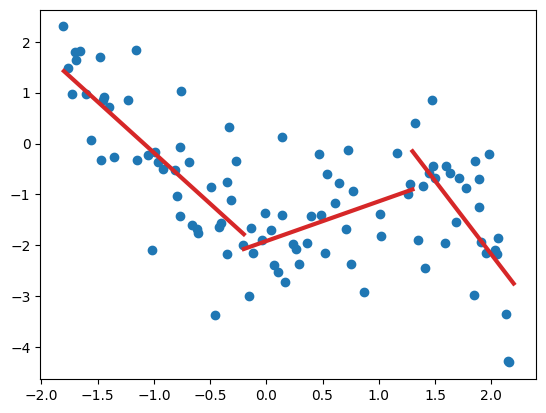

In [4]:
plt.plot(X, y, 'o', c='C0')   # show the training data
for interp_x, interp_y in piecewise_data:
    plt.plot(interp_x, interp_y, c='C3', lw=3)   # show the learned function

### 13.5.3 Piecewise Regression Splines

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import LSQUnivariateSpline

In [6]:
x = np.linspace(-1.5, 2.2, 100)
y_true = -2.3 * x + x**2 + 1.2 * x**3 - 0.4 * x**4 - 0.1 * x**5
y = y_true + 1.5 * (np.random.rand(x.size) - 0.5)

In [7]:
inner_support_points_x = [-0.5, 1.1]
spl = LSQUnivariateSpline(x, y, inner_support_points_x, k=3)

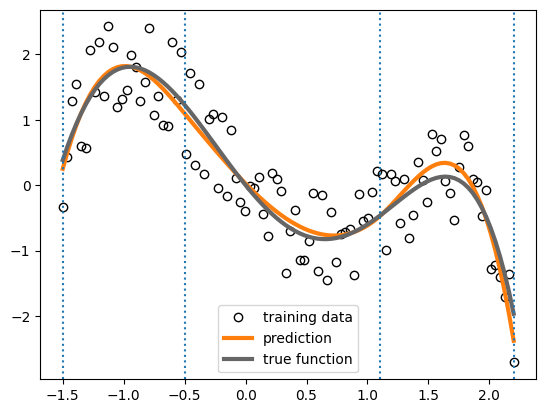

In [8]:
fig, ax = plt.subplots()
ax.plot(x, y, 'ok', mfc='none', label='training data')
ax.plot(x, spl(x), c='C1', lw=3, label='prediction')
ax.plot(x, y_true, c='0.4', lw=3, label='true function')
for x0 in [x[0]] + inner_support_points_x + [x[-1]]:
    ax.axvline(x0, ls=':')
ax.legend()

### 13.5.4 Kernel Regression with Gaussian Basis Functions

In [9]:
# These functions are the same as the ones in listing 13.2 and just copied here for convenience:

def RBF(x, mu, alpha=1):
    """Evaluates the Gaussian RBF at positions x. 
    
    The location and shape is given by mu and alpha.
    """
    return np.exp(-(mu - x)**2 / alpha)


def feature_matrix(X, mu_rbf, alpha):
    """Assemble the feature/design matrix from the RBFs.
    
    mu_rbf is a list of locations of the RBFs, 
    alpha is 'spread' of the Gaussians.
    """
    IX = np.ones((X.size, len(mu_rbf) + 1))
    for j, mu in enumerate(mu_rbf, start=1):
        IX[:,j] = RBF(X, mu, alpha)
    return IX

We generate a dataset from a polynomial and superimpose some random noise:

In [10]:
X = np.linspace(-1.5, 2.2, 80)
Y_true = -2.3 * X + X**2 + 1.2 * X**3 - 0.4 * X**4 - 0.1 * X**5
Y = Y_true + 1.5 * (np.random.rand(X.size) - 0.5)

Next, we define the number of kernel functions to be used, their position and their
shape:

In [11]:
n_rbf = 4                              # number of RBFs
mu_rbf = np.linspace(-1.8, 2, n_rbf)   # position of RBFs
alpha = 1                              # shape of all RBFs

With this, we can now call the function that populates the feature matrix with the
data evaluated by the RBFs and compute the weights using the closed form solution
for the ordinary least squares approach:

In [12]:
IX = feature_matrix(X, mu_rbf, alpha)
w = np.linalg.inv(IX.T @ IX) @ IX.T @ Y

For new data, X , we can create a new feature matrix keeping all parameters aside
from X constant and use the weights to make a prediction.

In [13]:
Y_pred = feature_matrix(X, mu_rbf, alpha) @ w

Finally, we can visualize the training data and the predictions:

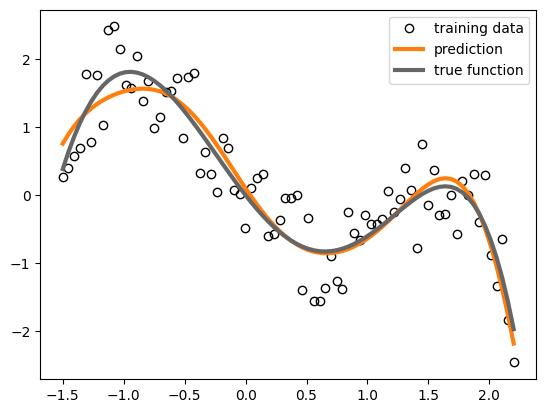

In [14]:
fig, ax = plt.subplots()
ax.plot(X, Y, 'ok', mfc='none', label='training data')
ax.plot(X, Y_pred, c='C1', lw=3, label='prediction')
ax.plot(X, Y_true, c='0.4', lw=3, label='true function')
ax.legend();